# Literary Masterpieces Project Analysis by Donato Scarano 




### INTRODUCTION

We want to analyze and explore famous literary masterpieces.
We are interested to extract valuable insights from the text and therefore understand better the work of Shakespeare.
We will use Python and it libraries which is one of the leading tools to work with language data.

Our first step is to import the NLTK and other libraries we will use in the project.


In [2]:
from os import path

import nltk
import pandas as pd
import numpy as np
import matplotlib

%pip install wordcloud
import wordcloud
from nltk.corpus import webtext
from nltk.probability import FreqDist

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk import sent_tokenize, word_tokenize
from nltk.corpus import gutenberg
from nltk import FreqDist
nltk.download('gutenberg')
nltk.download('punkt')
nltk.download('wordnet')


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\donsc\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\donsc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\donsc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

NLTK includes a selection of texts from Project Gutenberg which come handy for our project.
We choose to work on Shakespeare's Ceasar.
Using len we get the lenght of the text which is 25833 words.

In [3]:
nltk.corpus.gutenberg.fileids()
caesar = nltk.corpus.gutenberg.words('shakespeare-caesar.txt')
len(caesar)


25833

### DATASET DESCRIPTION

We want now to describe in further details our dataset which is in this case Shakespeare's Caesar.
We want for example to find the number of characters, number of words and number of sentences.

In [4]:
words = gutenberg.words('shakespeare-caesar.txt')
numchars = len(gutenberg.raw('shakespeare-caesar.txt'))
print("Number of Characters:", numchars)
numwords = len(gutenberg.words('shakespeare-caesar.txt'))
print("Number of Words:", numwords)
numsentences = len(gutenberg.sents('shakespeare-caesar.txt'))
print("Number of Sentences:", numsentences)

Number of Characters: 112310
Number of Words: 25833
Number of Sentences: 2163


Let us get more information and calculate the averages for each of the above.

In [5]:
avgword = numchars/numwords
avgsents = numwords/numsentences
print("Average Word length: ", avgword)
print("Average Sentence Length: ", avgsents)

Average Word length:  4.347539968257655
Average Sentence Length:  11.943134535367545


Let us explore further the text!
For example I want to extract the sentences in the book and find out which is the longest sentence of all.

In [6]:
caesarsents = gutenberg.sents('shakespeare-caesar.txt')
longsents = max(len(s) for s in caesarsents)
print("Longest Sentence in the book: ","Sentence Number:", longsents, [s for s in caesarsents if len(s) == longsents])


Longest Sentence in the book:  Sentence Number: 157 [['Ouer', 'thy', 'wounds', ',', 'now', 'do', 'I', 'Prophesie', ',', '(', 'Which', 'like', 'dumbe', 'mouthes', 'do', 'ope', 'their', 'Ruby', 'lips', ',', 'To', 'begge', 'the', 'voyce', 'and', 'vtterance', 'of', 'my', 'Tongue', ')', 'A', 'Curse', 'shall', 'light', 'vpon', 'the', 'limbes', 'of', 'men', ';', 'Domesticke', 'Fury', ',', 'and', 'fierce', 'Ciuill', 'strife', ',', 'Shall', 'cumber', 'all', 'the', 'parts', 'of', 'Italy', ':', 'Blood', 'and', 'destruction', 'shall', 'be', 'so', 'in', 'vse', ',', 'And', 'dreadfull', 'Obiects', 'so', 'familiar', ',', 'That', 'Mothers', 'shall', 'but', 'smile', ',', 'when', 'they', 'behold', 'Their', 'Infants', 'quartered', 'with', 'the', 'hands', 'of', 'Warre', ':', 'All', 'pitty', 'choak', "'", 'd', 'with', 'custome', 'of', 'fell', 'deeds', ',', 'And', 'Caesars', 'Spirit', 'ranging', 'for', 'Reuenge', ',', 'With', 'Ate', 'by', 'his', 'side', ',', 'come', 'hot', 'from', 'Hell', ',', 'Shall', 'in',

### DATA VISUALIZATION

#### WORD CLOUD

We want to use data visualizations to further refine our analysis of the text and understand the frequency of words in it.
As first thing I want to create a wordcloud that give me a first outlook of the most frequent words.
We put a filter to the lenght of words to avoid including the most common words(ie. he,she,this,that,is,where...) and punctuations.

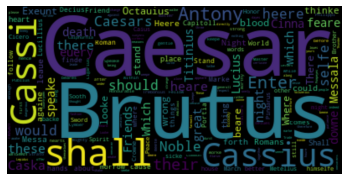

In [7]:
myWords = []

for row in words:
    myWords = myWords + nltk.word_tokenize(row)
    
freq = nltk.FreqDist(myWords)
filterwords = dict([(m,n) for m,n in freq.items() if len(m)>4])
wcloud = WordCloud().generate_from_frequencies(filterwords)
plt.imshow(wcloud, interpolation = 'gaussian')
plt.axis("off")
plt.show()

if we print the words filtered in the word cloud above when can see a full dictionary list with wordS and frequeny displayed.
We sort the results so we can see the most frequent words at the top.

In [9]:
filterwords

import operator
sortedfilter = sorted(filterwords.items(),key = operator.itemgetter(1), reverse = True)

sortedfilter



[('Caesar', 189),
 ('Brutus', 161),
 ('shall', 107),
 ('Cassi', 107),
 ('Cassius', 85),
 ('Antony', 75),
 ('Enter', 63),
 ('their', 57),
 ('heere', 41),
 ('would', 40),
 ('selfe', 39),
 ('Noble', 39),
 ('Caesars', 38),
 ('should', 38),
 ('there', 34),
 ('heare', 34),
 ('Caska', 33),
 ('these', 32),
 ('feare', 28),
 ('euery', 27),
 ('speake', 27),
 ('death', 26),
 ('Cinna', 26),
 ('Lucius', 26),
 ('great', 25),
 ('Messala', 25),
 ('Which', 24),
 ('which', 23),
 ('downe', 23),
 ('Friends', 23),
 ('Titinius', 23),
 ('night', 23),
 ('Octauius', 23),
 ('Exeunt', 22),
 ('stand', 21),
 ('beare', 20),
 ('There', 20),
 ('wrong', 20),
 ('Where', 19),
 ('blood', 19),
 ('looke', 19),
 ('thinke', 19),
 ('Night', 19),
 ('forth', 19),
 ('Messa', 19),
 ('Heere', 18),
 ('leaue', 18),
 ('againe', 18),
 ('could', 18),
 ('Romans', 18),
 ('thing', 18),
 ('place', 18),
 ('Shall', 18),
 ('heart', 18),
 ('Capitoll', 17),
 ('finde', 17),
 ('Decius', 17),
 ('Friend', 17),
 ('about', 16),
 ('things', 16),
 ('mor

#### LEXICAL DISPERSION PLOT

We also would lile for example to understand the location of the characters in the sequence of the text.
We can use NLTK Lexical Dispersion Plot to see where the different names occurr in the text, we can see that while the main characters such as Caesar or Bruto are present almost everywhere some other characters appear briefly and than disappear for example in a single act.

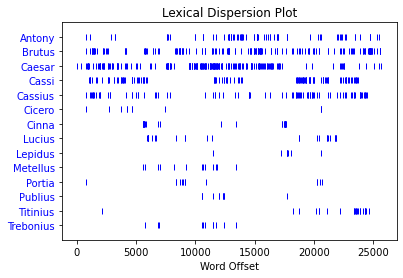

In [10]:
nltk.draw.dispersion.dispersion_plot(caesar, ["Antony","Brutus","Caesar","Cassi","Cassius","Cicero","Cinna","Lucius","Lepidus","Metellus","Portia","Publius","Titinius","Trebonius"])

### SUMMARY

In few lines of code we have used the powerful Python libraries to extract meaning and value out of text and obtain important insights.
We have tokenized the text and obtained important statistics about it.
We have calculated the number of characters words and sentences in the text and their average.
We have analyzed the lenght of sentences and we have visualized the frequency of word distributions via a Word Cloud and a Lexical Dispersion Plot.


### DISCUSSION/CRITICAL ANALYSIS

Our statistics obtained from a single work of Shakespeare are meaningful in the sense they provide us with useful information on a single work, let us though imagine that we apply the same techniques to all the works of Shakespeare and we compare them, what kind of valuable information we could find? We could compare for example the average number of words or sentences across hundreds of books to understand if there is a pattern in it, what about extending the analysis to all the works of Project Gutenberg or of a library. 
What additional insights we could find?
We could apply lexical dispersion plots and word cloud to have a clear visualization of what is at the center of those works and recurring patterns. 
The same techniques could be applied to internet, we could retrieve data from the web and scrape it using tools such as BeautifulSoup and NLTK.


### CONCLUSION/FURTHER WORK

There are enormous possibility to obtain value and insights from our data with Python and its libraries. An immediate extension of this work will be to incorporate all Shakespeare's books in the analysis and then compare them. Are there any recurring patterns in Shakespeare's works?
The second extension to this analysis I am planning to complete is a visual graph of each carachter in the books and its relations with the others and for this I am planning to use Plotly and Matplotlib.

### REFERENCES

Reference Libraries:
- Matplotlib: https://matplotlib.org
- Python Documentation: https://www.python.org
- NLTK Documentation: https://www.nltk.org/index.html
- Pandas Documentation: https://pandas.pydata.org/pandas-docs/stable/index.html
Books:
- Wes McKinney - Python for Data Analysis, O'Reilly 2nd Edition
- Steven Bird, Ewan Klein, Edward Loper - Natural Language Processing with Python

